In [1]:
#dummy_classifier() voir l'utilit" de cette  algo

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, QuantileTransformer, MinMaxScaler

In [4]:
data = pd.read_csv('Clenead/data2.csv')

In [5]:
data

,building_type,latitude,longitude,year_built,number_buildings,number_floors,proprety_gfa_total,energy_star_score,site_energy_use_wn_kbtu,total_ghg_emissions
0,NonResidential,47.61220,-122.33799,1927.0,1.0,12.0,88434.0,60.0,7.456910e+06,249.98
1,NonResidential,47.61317,-122.33393,1996.0,1.0,11.0,103566.0,61.0,8.664479e+06,295.86
2,NonResidential,47.61412,-122.33664,1926.0,1.0,10.0,61320.0,56.0,6.946800e+06,286.43
3,NonResidential,47.61375,-122.34047,1980.0,1.0,18.0,175580.0,75.0,1.465650e+07,505.01
4,Nonresidential COS,47.61623,-122.33657,1999.0,1.0,2.0,97288.0,45.0,1.258171e+07,301.81
...,...,...,...,...,...,...,...,...,...,...
1387,Nonresidential COS,47.56722,-122.31154,1990.0,1.0,1.0,12294.0,46.0,9.430032e+05,20.94
1388,Nonresidential COS,47.59625,-122.32283,2004.0,1.0,1.0,16000.0,75.4,1.053706e+06,32.17
1389,Nonresidential COS,47.63644,-122.35784,1974.0,1.0,1.0,13157.0,54.8,6.053764e+06,223.54
1390,Nonresidential COS,47.52832,-122.32431,1989.0,1.0,1.0,14101.0,57.2,7.828413e+05,22.11


In [6]:
data.columns

Index(['building_type', 'latitude', 'longitude', 'year_built',
       'number_buildings', 'number_floors', 'proprety_gfa_total',
       'energy_star_score', 'site_energy_use_wn_kbtu', 'total_ghg_emissions'],
      dtype='object')

# 1 Regression linéaire multiple

In [7]:
cols = ['latitude', 'longitude', 'proprety_gfa_total','building_type','energy_star_score','number_buildings', 'number_floors', 'total_ghg_emissions']
y = data['site_energy_use_wn_kbtu']
X = data.drop(columns=cols)


In [8]:
cols = ['site_energy_use_wn_kbtu','total_ghg_emissions','building_type']
X = data.drop(columns=cols)
y = data['site_energy_use_wn_kbtu']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [11]:
std_scaled = StandardScaler().fit(X_train)
X_train_scaled = std_scaled.transform(X_train)
X_test_scaled = std_scaled.transform(X_test)

### 1.1 Prédiction des données d'entrainement

In [12]:
regression_alg = LinearRegression()

In [13]:
X_train_scaled.shape, y_train.shape

((974, 7), (974,))

In [14]:
regression_alg.fit(X_train_scaled,y_train)

LinearRegression()

In [15]:
X_train_scaled

array([[-1.02219788,  0.17776517, -0.12982085, ..., -0.75814891,
        -0.64279394, -0.28049082],
       [-0.52768461, -0.0600708 ,  1.66241752, ...,  1.65504403,
         3.90399964,  1.20994267],
       [ 0.13902173,  0.48905633, -1.36584731, ..., -0.35595009,
         1.08580726,  0.05605868],
       ...,
       [ 0.0243577 ,  0.87856732,  0.45729172, ..., -0.35595009,
        -0.40362358,  0.48876517],
       [ 1.36427194, -1.95878802, -0.31522482, ..., -0.35595009,
        -0.5418661 , -0.58498799],
       [-1.26984854, -0.54447795,  0.33368907, ..., -0.35595009,
        -0.55719228, -0.31254316]])

In [16]:
y_pred = regression_alg.predict(X_train)

C:\Users\Dragomir\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [17]:
regression_alg.intercept_, regression_alg.coef_

(3507685.023665653,
 array([ 212221.78008491,    6162.79724514,  161573.69753198,
         246222.54476282,  488202.05391402, 2096654.84462363,
        -923399.09461024]))

In [18]:
r2_score(y_train,y_pred)

-3532380307.7410083

faire un test avec total gfa et year 



In [20]:
from math import sqrt
sqrt(mean_squared_error(y_train,y_pred))

200275180817.7151

### 1.2 Prediction avec des données de tests 

In [21]:
regression_alg.fit(X_train_scaled,y_train)

LinearRegression()

In [22]:
y_pred = regression_alg.predict(X_test_scaled)

In [23]:
regression_alg.intercept_, regression_alg.coef_

(3507685.023665653,
 array([ 212221.78008491,    6162.79724514,  161573.69753198,
         246222.54476282,  488202.05391402, 2096654.84462363,
        -923399.09461024]))

In [24]:
r2_score(y_test,y_pred)

0.5750860806174123

In [25]:
from math import sqrt
sqrt(mean_squared_error(y_test,y_pred))

2276378.870744895

In [26]:
from math import sqrt
sqrt(np.mean((y_pred-y_test)**2))

2276378.8707448943

In [27]:
baseline_error = sqrt(mean_squared_error(y_test,y_pred)) 
baseline_error

2276378.870744895

In [29]:
cols = ['site_energy_use_wn_kbtu','total_ghg_emissions','building_type']
X = data.drop(columns=cols)
y = data['site_energy_use_wn_kbtu']


def average_result(nb_run, X):
    
    average_rmse = 0
    average_r2 = 0
    
    for i_run in range(nb_run):
        
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
        std_scaled = StandardScaler().fit(X_train)
        X_train_scaled = std_scaled.transform(X_train)
        regression_alg = LinearRegression()
        regression_alg.fit(X_train_scaled,y_train)
        y_pred = regression_alg.predict(X_train_scaled)
        i_run_rmse = sqrt(mean_squared_error(y_train,y_pred))
        i_run_r2 = r2_score(y_train,y_pred)
        print(f"Run {i_run} : RMSE = {round(i_run_rmse,2)} - R2_score = {round(i_run_r2,2)} ")


average_result(9, X)

Run 0 : RMSE = 2357807.12 - R2_score = 0.54 
Run 1 : RMSE = 2341730.46 - R2_score = 0.53 
Run 2 : RMSE = 2335270.89 - R2_score = 0.53 
Run 3 : RMSE = 2330755.68 - R2_score = 0.53 
Run 4 : RMSE = 2339843.81 - R2_score = 0.54 
Run 5 : RMSE = 2405759.44 - R2_score = 0.52 
Run 6 : RMSE = 2313748.69 - R2_score = 0.53 
Run 7 : RMSE = 2427665.66 - R2_score = 0.49 
Run 8 : RMSE = 2248765.86 - R2_score = 0.56 


In [31]:
cols = ['site_energy_use_wn_kbtu','total_ghg_emissions','building_type']
X = data.drop(columns=cols)
y = data['site_energy_use_wn_kbtu']


def average_result(nb_run, X):
    
    average_rmse = 0
    average_r2 = 0
    
    for i_run in range(nb_run):
        
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
        std_scaled = StandardScaler().fit(X_train)
        X_train_scaled = std_scaled.transform(X_train)
        std_scaled = StandardScaler().fit(X_test)
        X_test_scaled = std_scaled.transform(X_test)
        regression_alg = LinearRegression()
        regression_alg.fit(X_train_scaled,y_train)
        y_pred = regression_alg.predict(X_test_scaled)
        i_run_rmse = sqrt(mean_squared_error(y_test,y_pred))
        i_run_r2 = r2_score(y_test,y_pred)
        print(f"Run {i_run} : RMSE = {round(i_run_rmse,2)} - R2_score = {round(i_run_r2,2)} ")


average_result(9, X)

Run 0 : RMSE = 2493164.3 - R2_score = 0.49 
Run 1 : RMSE = 2650691.31 - R2_score = 0.47 
Run 2 : RMSE = 2211170.17 - R2_score = 0.6 
Run 3 : RMSE = 2087063.44 - R2_score = 0.59 
Run 4 : RMSE = 2183494.55 - R2_score = 0.52 
Run 5 : RMSE = 2354186.62 - R2_score = 0.51 
Run 6 : RMSE = 2453830.25 - R2_score = 0.44 
Run 7 : RMSE = 2425505.77 - R2_score = 0.47 
Run 8 : RMSE = 2313640.16 - R2_score = 0.51 


In [32]:
def create_evaluate_model(index_fold, X_train, X_test, y_train, y_test):
    
        regression_alg = LinearRegression()
        regression_alg.fit(X_train_scaled,y_train)
        y_pred = regression_alg.predict(X_test_scaled)
        rmse = sqrt(mean_squared_error(y_test,y_pred))
        r2 = r2_score(y_test,y_pred)
        print(f"Run {index_fold} : RMSE = {round(rmse,2)} - R2_score = {round(r2,2)} ")
        return (rmse,r2)
        

In [53]:
from sklearn.model_selection import KFold


nb_model = 5
kf = KFold(n_splits=nb_model, shuffle=False)
index_fold = 0
average_rmse = 0
average_r2 = 0

cols = ['site_energy_use_wn_kbtu','total_ghg_emissions','building_type']
X = data.drop(columns=cols)
y = data['site_energy_use_wn_kbtu']


for train_index, test_index  in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # standardisation des donénes 
    std_scaled = StandardScaler().fit(X_train)
    X_train_scaled = std_scaled.transform(X_train)
    std_scaled = StandardScaler().fit(X_test)
    X_test_scaled = std_scaled.transform(X_test)
    
    # entrainement du modèle 
    
    current_rmse, current_r2 = create_evaluate_model(index_fold, X_train_scaled, X_test_scaled, y_train, y_test)
    
    average_rmse = average_rmse + current_rmse
    average_r2 = average_r2 + current_r2
    
    index_fold += 1

average_rmse = average_rmse / nb_model

average_r2 = average_r2 / nb_model

print(f"Moyenne : RMSE = {round(average_rmse,2)} - R2_score = {round(average_r2,2)} ")

Run 0 : RMSE = 4119158.67 - R2_score = -0.19 
Run 1 : RMSE = 2630980.64 - R2_score = 0.45 
Run 2 : RMSE = 3014916.28 - R2_score = -0.6 
Run 3 : RMSE = 3062434.88 - R2_score = -1.08 
Run 4 : RMSE = 2532178.35 - R2_score = 0.41 
Moyenne : RMSE = 3071933.77 - R2_score = -0.2 


### Pipeline 

In [35]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import PolynomialFeatures

def create_pipeline_evaluate_model(index_fold, X_train, X_test, y_train, y_test):
    
        polynomial_features = PolynomialFeatures()
        regression_alg = LinearRegression()
        
        model = Pipeline ([("polynomial_features",polynomial_features),("linear_regression", regression_alg)])
        model.fit(X_train_scaled,y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = sqrt(mean_squared_error(y_test,y_pred))
        r2 = r2_score(y_test,y_pred)
        print(f"Run {index_fold} : RMSE = {round(rmse,2)} - R2_score = {round(r2,2)} ")
        return (rmse,r2)
        

In [36]:
nb_model = 9
kf = KFold(n_splits=nb_model, shuffle=False)
index_fold = 0
average_rmse = 0
average_r2 = 0

cols = ['site_energy_use_wn_kbtu','total_ghg_emissions','building_type']
X = data.drop(columns=cols)
y = data['site_energy_use_wn_kbtu']


for train_index, test_index  in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # standardisation des données 
    std_scaled = StandardScaler().fit(X_train)
    X_train_scaled = std_scaled.transform(X_train)
    std_scaled = StandardScaler().fit(X_test)
    X_test_scaled = std_scaled.transform(X_test)
    
    # entrainement du modèle 
    
    current_rmse, current_r2 = create_pipeline_evaluate_model(index_fold, X_train_scaled, X_test_scaled, y_train, y_test)
    
    average_rmse = average_rmse + current_rmse
    average_r2 = average_r2 + current_r2
    
    index_fold += 1

average_rmse = average_rmse / nb_model

average_r2 = average_r2 / nb_model

print(f"Moyenne : RMSE = {round(average_rmse,2)} - R2_score = {round(average_r2,2)} ")

Run 0 : RMSE = 3836297.04 - R2_score = -0.11 
Run 1 : RMSE = 3665817.31 - R2_score = 0.12 
Run 2 : RMSE = 3411048.7 - R2_score = 0.2 
Run 3 : RMSE = 2771767.62 - R2_score = -0.83 
Run 4 : RMSE = 2562827.78 - R2_score = -0.29 
Run 5 : RMSE = 3015476.52 - R2_score = -0.42 
Run 6 : RMSE = 2964527.7 - R2_score = -1.27 
Run 7 : RMSE = 2790309.38 - R2_score = -0.86 
Run 8 : RMSE = 2743508.22 - R2_score = 0.49 
Moyenne : RMSE = 3084620.03 - R2_score = -0.33 


In [37]:
scaler = StandardScaler()
linear = LinearRegression()
forest_reg = RandomForestRegressor()

In [38]:
from sklearn.impute import KNNImputer


pipe = Pipeline([
                 ('scaled',StandardScaler()),
                 ('estimator',LinearRegression()),
                 ])

In [39]:
cols = ['site_energy_use_wn_kbtu','total_ghg_emissions','building_type','energy_star_score','proprety_gfa_total','longitude','latitude','number_buildings','number_floors']
X = data.drop(columns=cols)
y = data['site_energy_use_wn_kbtu']


for train_index, test_index  in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
X_train

,year_built
0,1927.0
1,1996.0
2,1926.0
3,1980.0
4,1999.0
...,...
1233,1988.0
1234,1999.0
1235,1954.0
1236,1928.0


In [40]:
from sklearn.neighbors import KNeighborsRegressor

param_grid = {'scaled':[StandardScaler(),QuantileTransformer(),MinMaxScaler(),'passthrough'],
             'estimator':[LinearRegression(), RandomForestRegressor(), KNeighborsRegressor(),DummyRegressor()]}
param_grid

{'scaled': [StandardScaler(),
  QuantileTransformer(),
  MinMaxScaler(),
  'passthrough'],
 'estimator': [LinearRegression(),
  RandomForestRegressor(),
  KNeighborsRegressor(),
  DummyRegressor()]}

In [41]:
grid = GridSearchCV(pipe,param_grid=param_grid, cv=3,return_train_score=True ,n_jobs=-1, verbose=1)

In [42]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaled', StandardScaler()),
                                       ('estimator', LinearRegression())]),
             n_jobs=-1,
             param_grid={'estimator': [LinearRegression(),
                                       RandomForestRegressor(),
                                       KNeighborsRegressor(),
                                       DummyRegressor()],
                         'scaled': [StandardScaler(), QuantileTransformer(),
                                    MinMaxScaler(), 'passthrough']},
             return_train_score=True, verbose=1)

In [43]:
grid_cv = pd.DataFrame(grid.cv_results_)

new_cols = [i for i in grid_cv.columns if 'split' not in i.lower()]

grid_cv.loc[:,new_cols].sort_values('mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_scaled,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
1,0.028521,0.002541,0.002998,8.225699e-04,LinearRegression(),QuantileTransformer(),"{'estimator': LinearRegression(), 'scaled': Qu...",-0.619635,0.274669,1,0.040739,0.010988
0,0.027512,0.009644,0.002667,4.736752e-04,LinearRegression(),StandardScaler(),"{'estimator': LinearRegression(), 'scaled': St...",-0.630413,0.282764,2,0.036037,0.009157
2,0.024185,0.008129,0.002998,4.566751e-06,LinearRegression(),MinMaxScaler(),"{'estimator': LinearRegression(), 'scaled': Mi...",-0.630413,0.282764,3,0.036037,0.009157
3,0.017332,0.000942,0.002680,4.801937e-04,LinearRegression(),passthrough,"{'estimator': LinearRegression(), 'scaled': 'p...",-0.630413,0.282764,4,0.036037,0.009157
12,0.005004,0.000008,0.002508,4.087800e-04,DummyRegressor(),StandardScaler(),"{'estimator': DummyRegressor(), 'scaled': Stan...",-0.700200,0.336860,5,0.000000,0.000000
13,0.014174,0.009796,0.003000,6.257699e-07,DummyRegressor(),QuantileTransformer(),"{'estimator': DummyRegressor(), 'scaled': Quan...",-0.700200,0.336860,5,0.000000,0.000000
14,0.005334,0.000474,0.002000,3.705515e-06,DummyRegressor(),MinMaxScaler(),"{'estimator': DummyRegressor(), 'scaled': MinM...",-0.700200,0.336860,5,0.000000,0.000000
15,0.001334,0.000471,0.000667,4.713761e-04,DummyRegressor(),passthrough,"{'estimator': DummyRegressor(), 'scaled': 'pas...",-0.700200,0.336860,5,0.000000,0.000000
6,0.263420,0.010374,0.020671,2.057853e-03,RandomForestRegressor(),MinMaxScaler(),"{'estimator': RandomForestRegressor(), 'scaled...",-0.836643,0.245088,9,0.194714,0.024497
4,0.299627,0.016993,0.021333,1.697134e-03,RandomForestRegressor(),StandardScaler(),"{'estimator': RandomForestRegressor(), 'scaled...",-0.849167,0.245213,10,0.194365,0.024375


In [44]:
grid.best_estimator_, grid.best_score_, grid.best_params_

(Pipeline(steps=[('scaled', QuantileTransformer()),
                 ('estimator', LinearRegression())]),
 -0.6196346129076639,
 {'estimator': LinearRegression(), 'scaled': QuantileTransformer()})

In [89]:
cols = ['site_energy_use_wn_kbtu','total_ghg_emissions','building_type']

X = data.drop(columns=cols)
y = data['site_energy_use_wn_kbtu']

'''
for train_index, test_index  in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
X_train
'''


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

param_grid = {'scaled':[StandardScaler(),QuantileTransformer(),MinMaxScaler(),'passthrough'],
             'estimator':[LinearRegression(), RandomForestRegressor(), KNeighborsRegressor(),DummyRegressor()]}
param_grid

grid = GridSearchCV(pipe,param_grid=param_grid, cv=5,return_train_score=True ,n_jobs=-1, verbose=1)

grid.fit(X_train,y_train)

grid_cv = pd.DataFrame(grid.cv_results_)

new_cols = [i for i in grid_cv.columns if 'split' not in i.lower()]

grid_cv.loc[:,new_cols].sort_values('mean_test_score', ascending=False)



Fitting 5 folds for each of 16 candidates, totalling 80 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_scaled,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
4,0.672198,0.060121,0.020418,0.000867,RandomForestRegressor(),StandardScaler(),"{'estimator': RandomForestRegressor(), 'scaled...",0.538409,0.034886,1,0.934728,0.002584
7,0.550650,0.034915,0.012401,0.003005,RandomForestRegressor(),passthrough,"{'estimator': RandomForestRegressor(), 'scaled...",0.534408,0.046572,2,0.934835,0.002277
5,0.612866,0.043736,0.021411,0.001025,RandomForestRegressor(),QuantileTransformer(),"{'estimator': RandomForestRegressor(), 'scaled...",0.533560,0.045436,3,0.934751,0.000812
6,0.565955,0.015650,0.018607,0.003445,RandomForestRegressor(),MinMaxScaler(),"{'estimator': RandomForestRegressor(), 'scaled...",0.526739,0.042137,4,0.936739,0.001418
3,0.009404,0.004496,0.003200,0.000402,LinearRegression(),passthrough,"{'estimator': LinearRegression(), 'scaled': 'p...",0.511314,0.037255,5,0.528330,0.009408
2,0.016425,0.010373,0.003599,0.000491,LinearRegression(),MinMaxScaler(),"{'estimator': LinearRegression(), 'scaled': Mi...",0.511314,0.037255,6,0.528330,0.009408
0,0.023917,0.005405,0.003203,0.000401,LinearRegression(),StandardScaler(),"{'estimator': LinearRegression(), 'scaled': St...",0.511314,0.037255,7,0.528330,0.009408
8,0.006703,0.000399,0.006601,0.000493,KNeighborsRegressor(),StandardScaler(),"{'estimator': KNeighborsRegressor(), 'scaled':...",0.456929,0.053298,8,0.630665,0.007833
10,0.005702,0.000399,0.007905,0.004105,KNeighborsRegressor(),MinMaxScaler(),"{'estimator': KNeighborsRegressor(), 'scaled':...",0.408648,0.022920,9,0.596106,0.013304
1,0.046324,0.015519,0.004401,0.000487,LinearRegression(),QuantileTransformer(),"{'estimator': LinearRegression(), 'scaled': Qu...",0.401801,0.041081,10,0.425049,0.011336


In [48]:
grid.best_estimator_, grid.best_score_, grid.best_params_

(Pipeline(steps=[('scaled', StandardScaler()),
                 ('estimator', RandomForestRegressor())]),
 0.5747375058648131,
 {'estimator': RandomForestRegressor(), 'scaled': StandardScaler()})

In [52]:
cols = ['site_energy_use_wn_kbtu','total_ghg_emissions','building_type','energy_star_score','longitude','latitude','number_buildings']

X = data.drop(columns=cols)
y = data['site_energy_use_wn_kbtu']

'''
for train_index, test_index  in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
X_train
'''
print(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

param_grid = {'scaled':[StandardScaler(),QuantileTransformer(),MinMaxScaler(),'passthrough'],
             'estimator':[LinearRegression(), RandomForestRegressor(), KNeighborsRegressor(),DummyRegressor()]}
param_grid

grid = GridSearchCV(pipe,param_grid=param_grid, cv=3,return_train_score=True ,n_jobs=-1, verbose=1)

grid.fit(X_train,y_train)

grid_cv = pd.DataFrame(grid.cv_results_)

new_cols = [i for i in grid_cv.columns if 'split' not in i.lower()]

grid_cv.loc[:,new_cols].sort_values('mean_test_score', ascending=False)



      year_built  number_floors  proprety_gfa_total
0         1927.0           12.0             88434.0
1         1996.0           11.0            103566.0
2         1926.0           10.0             61320.0
3         1980.0           18.0            175580.0
4         1999.0            2.0             97288.0
...          ...            ...                 ...
1387      1990.0            1.0             12294.0
1388      2004.0            1.0             16000.0
1389      1974.0            1.0             13157.0
1390      1989.0            1.0             14101.0
1391      1938.0            1.0             18258.0

[1392 rows x 3 columns]
Fitting 3 folds for each of 16 candidates, totalling 48 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_scaled,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
0,0.023573,0.003578,0.002668,0.000471,LinearRegression(),StandardScaler(),"{'estimator': LinearRegression(), 'scaled': St...",0.449907,0.025532,1,0.456386,0.013060
2,0.022519,0.001063,0.003513,0.000408,LinearRegression(),MinMaxScaler(),"{'estimator': LinearRegression(), 'scaled': Mi...",0.449907,0.025532,1,0.456386,0.013060
3,0.021351,0.003663,0.003004,0.000816,LinearRegression(),passthrough,"{'estimator': LinearRegression(), 'scaled': 'p...",0.449907,0.025532,3,0.456386,0.013060
8,0.005998,0.000001,0.003999,0.000001,KNeighborsRegressor(),StandardScaler(),"{'estimator': KNeighborsRegressor(), 'scaled':...",0.416723,0.032224,4,0.626987,0.010627
6,0.418978,0.020407,0.022852,0.002023,RandomForestRegressor(),MinMaxScaler(),"{'estimator': RandomForestRegressor(), 'scaled...",0.410508,0.036482,5,0.918393,0.003360
4,0.406387,0.018608,0.022336,0.000945,RandomForestRegressor(),StandardScaler(),"{'estimator': RandomForestRegressor(), 'scaled...",0.404522,0.039274,6,0.915733,0.001099
5,0.415652,0.024390,0.027859,0.003403,RandomForestRegressor(),QuantileTransformer(),"{'estimator': RandomForestRegressor(), 'scaled...",0.396508,0.042490,7,0.919417,0.001079
7,0.412347,0.004501,0.014185,0.001703,RandomForestRegressor(),passthrough,"{'estimator': RandomForestRegressor(), 'scaled...",0.395934,0.038471,8,0.920320,0.001785
10,0.008504,0.002278,0.004671,0.000475,KNeighborsRegressor(),MinMaxScaler(),"{'estimator': KNeighborsRegressor(), 'scaled':...",0.392463,0.033973,9,0.614029,0.010725
9,0.010332,0.000944,0.004839,0.000631,KNeighborsRegressor(),QuantileTransformer(),"{'estimator': KNeighborsRegressor(), 'scaled':...",0.371082,0.046506,10,0.595197,0.003959


In [90]:
cols = ['site_energy_use_wn_kbtu','total_ghg_emissions','building_type','energy_star_score','longitude','latitude','number_buildings']

X = data.drop(columns=cols)
y = data['site_energy_use_wn_kbtu']

'''
for train_index, test_index  in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
X_train
'''
print(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

param_grid = {'scaled':[StandardScaler(),QuantileTransformer(),MinMaxScaler(),'passthrough'],
             'estimator':[LinearRegression(), RandomForestRegressor(), KNeighborsRegressor(),DummyRegressor(),Ridge(),Lasso(fit_intercept=False)]}
param_grid

grid = GridSearchCV(pipe,param_grid=param_grid, cv=5,return_train_score=True ,n_jobs=-1, verbose=1)

grid.fit(X_train,y_train)

grid_cv = pd.DataFrame(grid.cv_results_)

new_cols = [i for i in grid_cv.columns if 'split' not in i.lower()]

grid_cv.loc[:,new_cols].sort_values('mean_test_score', ascending=False)

      year_built  number_floors  proprety_gfa_total
0         1927.0           12.0             88434.0
1         1996.0           11.0            103566.0
2         1926.0           10.0             61320.0
3         1980.0           18.0            175580.0
4         1999.0            2.0             97288.0
...          ...            ...                 ...
1387      1990.0            1.0             12294.0
1388      2004.0            1.0             16000.0
1389      1974.0            1.0             13157.0
1390      1989.0            1.0             14101.0
1391      1938.0            1.0             18258.0

[1392 rows x 3 columns]
Fitting 5 folds for each of 24 candidates, totalling 120 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_scaled,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
16,0.006399,0.000801,0.002399,0.000490,Ridge(),StandardScaler(),"{'estimator': Ridge(), 'scaled': StandardScale...",0.451632,0.050112,1,0.457035,0.011581
19,0.003199,0.000400,0.001800,0.000401,Ridge(),passthrough,"{'estimator': Ridge(), 'scaled': 'passthrough'}",0.451620,0.050227,2,0.457035,0.011581
0,0.022210,0.006487,0.006514,0.007525,LinearRegression(),StandardScaler(),"{'estimator': LinearRegression(), 'scaled': St...",0.451619,0.050225,3,0.457035,0.011581
2,0.013219,0.005762,0.003103,0.000210,LinearRegression(),MinMaxScaler(),"{'estimator': LinearRegression(), 'scaled': Mi...",0.451619,0.050225,3,0.457035,0.011581
3,0.005312,0.001172,0.003598,0.001743,LinearRegression(),passthrough,"{'estimator': LinearRegression(), 'scaled': 'p...",0.451619,0.050225,5,0.457035,0.011581
23,0.003202,0.000406,0.002201,0.000400,Lasso(fit_intercept=False),passthrough,"{'estimator': Lasso(fit_intercept=False), 'sca...",0.448335,0.049350,6,0.453162,0.011540
18,0.009508,0.008517,0.001999,0.000001,Ridge(),MinMaxScaler(),"{'estimator': Ridge(), 'scaled': MinMaxScaler()}",0.445092,0.043820,7,0.452736,0.012588
22,0.006614,0.002185,0.005906,0.006322,Lasso(fit_intercept=False),MinMaxScaler(),"{'estimator': Lasso(fit_intercept=False), 'sca...",0.430776,0.057560,8,0.437217,0.013063
8,0.007008,0.000832,0.004105,0.000208,KNeighborsRegressor(),StandardScaler(),"{'estimator': KNeighborsRegressor(), 'scaled':...",0.412326,0.060803,9,0.587964,0.012326
4,0.392508,0.009224,0.026600,0.007337,RandomForestRegressor(),StandardScaler(),"{'estimator': RandomForestRegressor(), 'scaled...",0.410575,0.049575,10,0.916516,0.002221


1 er combinaison : year_built  number_floors  proprety_gfa_total
2 eme combinaisaon :

# 2 regresion linéaire multiple de RIDGE et LASSO

In [44]:
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

### 2.1 Regression linéaire de RIDGE

In [45]:
from sklearn import linear_model
#from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, np.mean((ridge.predict(X_train_scaled) - y_train) ** 2)])

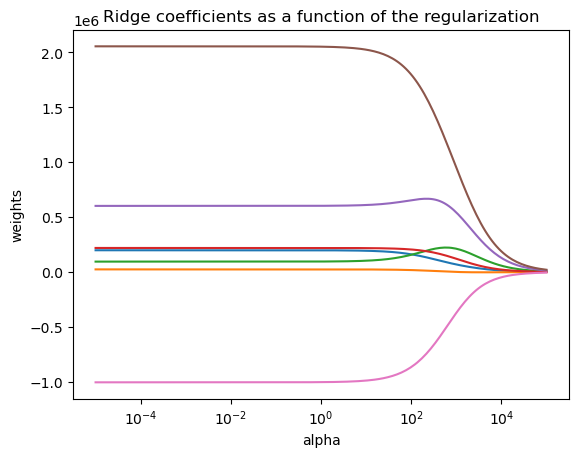

In [46]:
import matplotlib.pyplot as plt

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [56]:
coefs[:2]

[array([  198503.32367127,    24473.29780107,    95134.6245321 ,
          219457.71610641,   602040.32700578,  2053729.56910764,
        -1002932.6502303 ]),
 array([  198503.32367057,    24473.29780056,    95134.62453209,
          219457.71610608,   602040.32700594,  2053729.56910695,
        -1002932.65022964])]

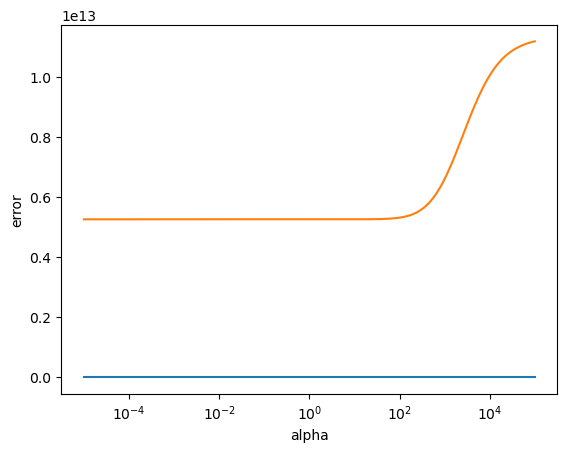

In [48]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [49]:
min(errors)

[2361897.0576801016, 5264452388664.426]

### 2.2 Regression linéaire de LASSO

In [50]:
n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_scaled, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, np.mean((lasso.predict(X_train_scaled) - y_train) ** 2)])

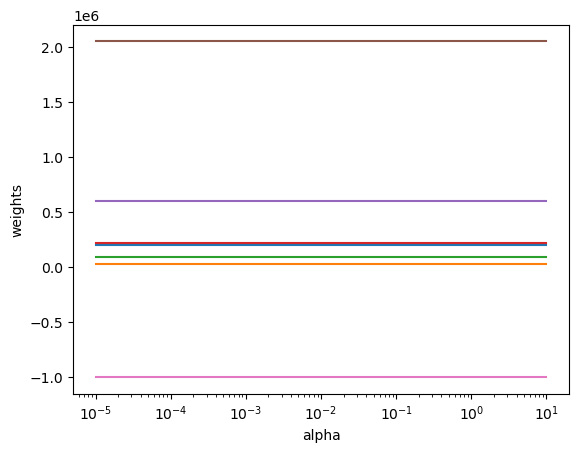

In [51]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

In [52]:
min(errors)

[2361897.0576801016, 18035024345000.125]

In [53]:
alphas[:10]

array([1.00000000e-05, 1.04728984e-05, 1.09681601e-05, 1.14868426e-05,
       1.20300535e-05, 1.25989528e-05, 1.31947552e-05, 1.38187331e-05,
       1.44722187e-05, 1.51566076e-05])

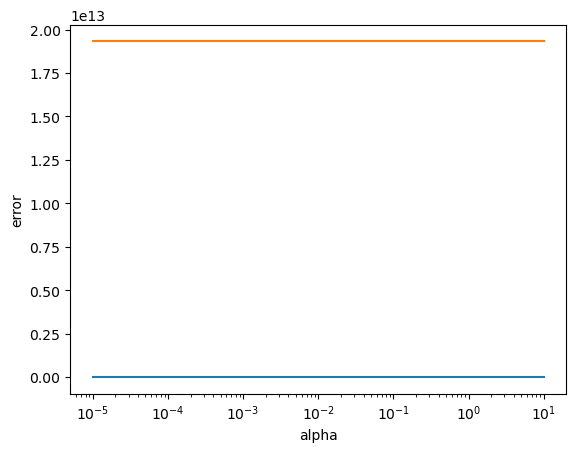

In [152]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()